<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Vanguard_Portfolio_Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install yfinance

In [46]:
pip install fix_yahoo_finance

In [47]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [48]:
ticks = ["AAPL", "MSFT", "TSLA", "IBM"]
df = yf.download(ticks, start="2015-01-01", end="2022-01-05", rounding= True)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [49]:
df.tail(11)

,AAPL,IBM,MSFT,TSLA
Date,,,,
2021-12-20,169.75,127.06,319.91,899.94
2021-12-21,172.99,128.97,327.29,938.53
2021-12-22,175.64,129.75,333.20,1008.87
2021-12-23,176.28,130.63,334.69,1067.00
2021-12-27,180.33,131.62,342.45,1093.94
2021-12-28,179.29,132.63,341.25,1088.47
2021-12-29,179.38,133.35,341.95,1086.19
2021-12-30,178.20,133.91,339.32,1070.34
2021-12-31,177.57,133.66,336.32,1056.78


**Percentage(%) Change**

In [50]:
df.pct_change()

,AAPL,IBM,MSFT,TSLA
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028283,-0.015751,-0.008983,-0.041952
2015-01-06,0.000000,-0.021574,-0.014699,0.005712
2015-01-07,0.014137,-0.006506,0.012680,-0.001656
2015-01-08,0.038540,0.021739,0.029462,-0.001659
...,...,...,...,...
2021-12-29,0.000502,0.005429,0.002051,-0.002095
2021-12-30,-0.006578,0.004199,-0.007691,-0.014592
2021-12-31,-0.003535,-0.001867,-0.008841,-0.012669


**Logarithmic Returns**

In [51]:
log_returns = df.pct_change().apply(lambda x:np.log(1+x))

In [52]:
log_returns.tail(11)

,AAPL,IBM,MSFT,TSLA
Date,,,,
2021-12-20,-0.008155,-0.002672,-0.012086,-0.035616
2021-12-21,0.018907,0.014920,0.022807,0.041987
2021-12-22,0.015203,0.006030,0.017896,0.072271
2021-12-23,0.003637,0.006759,0.004462,0.056020
2021-12-27,0.022715,0.007550,0.022921,0.024935
2021-12-28,-0.005784,0.007644,-0.003510,-0.005013
2021-12-29,0.000502,0.005414,0.002049,-0.002097
2021-12-30,-0.006600,0.004191,-0.007721,-0.014700
2021-12-31,-0.003542,-0.001869,-0.008881,-0.012750


**Variance Calculation**

In [53]:
log_returns['AAPL'].var()

0.0003347821315081428

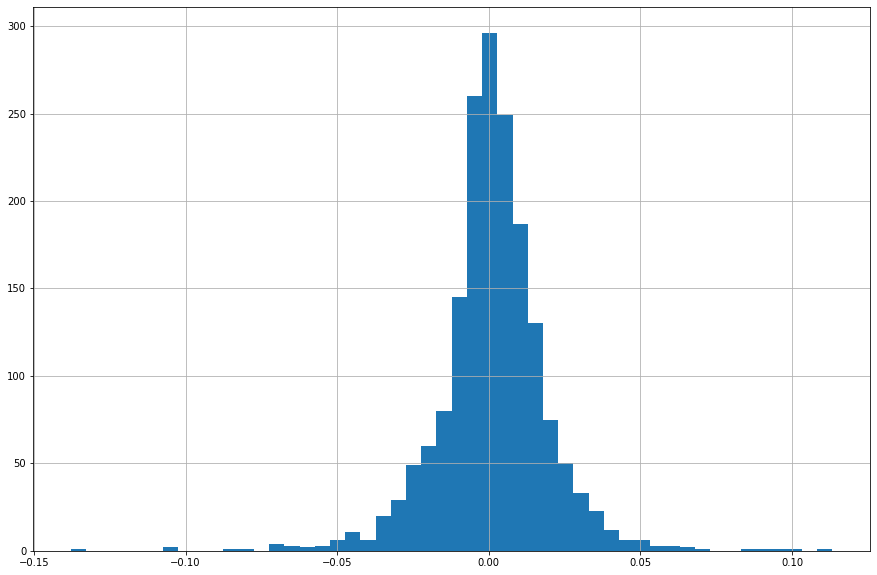

In [56]:
log_returns['AAPL'].hist(bins=50, figsize=(15,10))

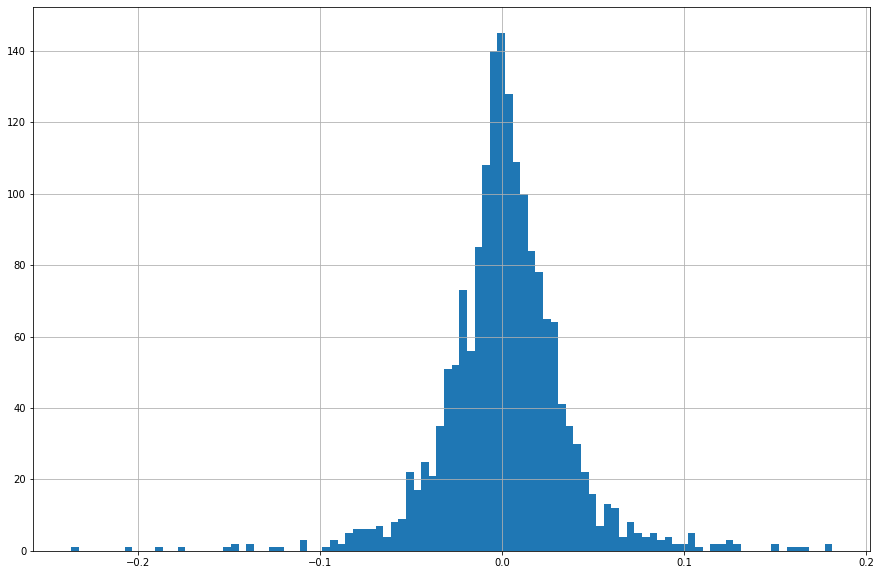

In [57]:
log_returns['TSLA'].hist(bins=100, figsize=(15,10))

In [58]:
log_returns['AAPL'].mean()

0.0011238454108700754

In [60]:
log_returns['TSLA'].mean()

0.0018515634314395914

**Standard Deviation for a single year and 252 Trading Days**

**Calculating Volatility**

In [61]:
log_returns['AAPL'].std()

0.018297052536081947

In [63]:
log_returns['AAPL'].std()*np.sqrt(252)

0.29045670441573906

In [62]:
log_returns['TSLA'].std()

0.03473428488840882

In [66]:
log_returns['TSLA'].std()*np.sqrt(252)

0.5513896786943918

**Covariance**

In [69]:
log_returns[['AAPL', 'TSLA']].cov()

,AAPL,TSLA
AAPL,0.000335,0.000249
TSLA,0.000249,0.001206


**Covariance Matrix**

In [70]:
covariance_matrix = log_returns.cov()

In [71]:
covariance_matrix

,AAPL,IBM,MSFT,TSLA
AAPL,0.000335,0.000123,0.000213,0.000249
IBM,0.000123,0.000247,0.000132,0.000129
MSFT,0.000213,0.000132,0.000288,0.000236
TSLA,0.000249,0.000129,0.000236,0.001206
